D:\Users\ouyangqq\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


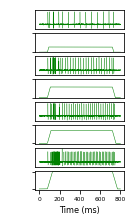

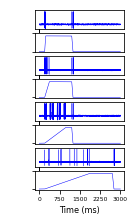

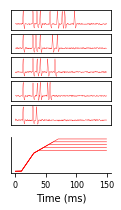

In [2]:
filepath='saved_figs/'
#action potential response to stimulus
from sys import path
path.append(r'../tactile_receptors/') 
import Receptors as receptorlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

color_bf=['g','b','r','k']

def Print_fig1(tsensor,x,para1,para2,para3,colour):
    global start
    global tr
    global Tend
    #global T
    intentation=para1*1e-6
    rate=para2
    rate1=para3
    tsensor.stimulus[tsensor.stp,:]=receptorlib.step_wave(tsensor.t,Tstart,Tend,rate,rate1,intentation)
    tsensor.tactile_units_simulating(tsensor.stimulus)
    fig.add_subplot(8,1,2*x-1)
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Va[tsensor.stp,start:start+tr],colour,linewidth=0.3)
    plt.yticks([],fontsize=11,color='none')
    if(colour=='b'):
        plt.xticks([0,0.2*tsensor.T,0.4*tsensor.T,0.6*tsensor.T,0.8*tsensor.T,tsensor.T],fontsize=11,color='none')
    else:
        plt.xticks([],fontsize=11,color='none')
    if(x==15):
        plt.xlabel("SA1")
    #plt.ylabel('um') 
    fig.add_subplot(8,1,2*x)
    plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.stimulus[tsensor.stp,start:start+tr],colour+'-',linewidth=0.5)
    plt.yticks([0,990],fontsize=11,color='none')
    plt.xticks([],fontsize=11,color='none')
    if(x==4):
        plt.xticks([0,1000*tsensor.T/4,1000*tsensor.T/2,1000*3*tsensor.T/4,1000*tsensor.T],fontsize=6)
        plt.xlabel("Time (ms)",fontsize=8)

#----Simulating responses of single SA1 unit to ramp-and-hold indentations at different indentation depths
tsensor=receptorlib.tactile_receptors(Ttype='SA1',simTime=0.8,sample_rate=10000,sample_num=1)      
Tstart=0.1*tsensor.T
Tend=0.9*tsensor.T
start=0
tr=int(tsensor.T/tsensor.dt-4)
fig=plt.figure(figsize=(1.6,3.3)) 
Amv=[270,570,690,990]           
Print_fig1(tsensor,1,Amv[0],20,-20,color_bf[0])
Print_fig1(tsensor,2,Amv[1],20,-20,color_bf[0])
Print_fig1(tsensor,3,Amv[2],20,-20,color_bf[0])
Print_fig1(tsensor,4,Amv[3],20,-20,color_bf[0])
plt.savefig(filepath+'adaption_SA1.png',bbox_inches='tight', dpi=600)
#-------------- 


#----Simulating responses of single RA1 unit to ramps approaching indention of 850 um at different speeds.
tsensor=receptorlib.tactile_receptors(Ttype='RA1',simTime=3,sample_rate=10000,sample_num=1)
Tstart=0.2
Tend=Tstart+1
start=0
tr=int(tsensor.T/tsensor.dt-4)
fig=plt.figure(figsize=(1.6,3.3)) 
Amv=[26,5,1.1,0.51] 
Print_fig1(tsensor,1,850,Amv[0],-20,color_bf[1])
Print_fig1(tsensor,2,850,Amv[1],-20,color_bf[1])
Print_fig1(tsensor,3,850,Amv[2],-20,color_bf[1])
tr=int(tsensor.T/tsensor.dt-4)
Tend=0.9*tsensor.T
Print_fig1(tsensor,4,850,Amv[3],-15,color_bf[1])
plt.savefig(filepath+'adaption_RA1.png',bbox_inches='tight', dpi=600)
#-------------- 



#Simulating responses of a PC unit to stimulus with reduction of indentation amplitude
tsensor=receptorlib.tactile_receptors(Ttype='PC',simTime=1,sample_rate=10000,sample_num=10)
tr=int(0.15/tsensor.dt-2)
start=int(0/tsensor.dt) 
rate=50  #mm/s
rate1=-20 
Tstart=0
Tend=0.2


plt.figure(figsize=(1.8,3)) 
for i in range(0,5):    
    Tstart=0.01
    intentation=1000*1e-6#um
    rate=50  #mm/s
    tsensor.stimulus[tsensor.stp+i+1,int(Tstart/tsensor.dt):]+=receptorlib.step_wave(tsensor.t,Tstart,Tend,rate,rate1,intentation)[int(Tstart/tsensor.dt):]
    
    Tstart=Tstart+intentation*1e3/rate
    intentation=(i+1)*160*1e-6 #um
    rate=20  #mm/s
    tsensor.stimulus[tsensor.stp+i+1,int(Tstart/tsensor.dt):]+=receptorlib.step_wave(tsensor.t,Tstart,Tend,rate,rate1,intentation)[int(Tstart/tsensor.dt):]

for i in range(5):    
    tsensor.stimulus[tsensor.stp,:]=tsensor.stimulus[tsensor.stp+5-i,:]
    tsensor.tactile_units_simulating(tsensor.stimulus)
    plt.subplot(7,1,1+i)
    plt.plot(1000*tsensor.t[start:start+tr],tsensor.Va[tsensor.stp,start:start+tr],color_bf[2],linewidth=0.3)
    plt.yticks([],fontsize=10,color='none')
    plt.xticks([])

ax1=plt.subplot(414)
ax1.spines['top'].set_color('None')
ax1.spines['right'].set_color('None') 
plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.stimulus[tsensor.stp+1,start:start+tr],color_bf[2]+'-',linewidth=0.5)
plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.stimulus[tsensor.stp+2,start:start+tr],color_bf[2]+'-',linewidth=0.5)
plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.stimulus[tsensor.stp+3,start:start+tr],color_bf[2]+'-',linewidth=0.5)
plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.stimulus[tsensor.stp+4,start:start+tr],color_bf[2]+'-',linewidth=0.5)
plt.plot(1000*tsensor.t[start:start+tr],1e6*tsensor.stimulus[tsensor.stp+5,start:start+tr],color_bf[2]+'-',linewidth=0.5)
plt.yticks([],fontsize=11,color='none')
plt.xticks([0,50,100,150],fontsize=8)
plt.xlabel('Time (ms)',fontsize=10)

plt.savefig(filepath+'adaption_pc.png',bbox_inches='tight', dpi=300)
#-------------- 
